<a href="https://colab.research.google.com/github/ahmadjan223/machine-learning/blob/main/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('/content/sample_data_with_issues.csv')
data2 = pd.read_csv('/content/sample_data_with_issues.csv')

In [ ]:
data.describe()


,ID,Age,Salary,Purchase Amount
count,20.00000,18.000000,17.000000,18.000000
mean,10.50000,40.055556,101470.588235,594.444444
std,5.91608,20.604032,81024.006973,331.613209
min,1.00000,20.000000,30000.000000,100.000000
25%,5.75000,27.250000,70000.000000,312.500000
50%,10.50000,31.500000,90000.000000,575.000000
75%,15.25000,48.750000,105000.000000,887.500000
max,20.00000,100.000000,400000.000000,1100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20 non-null     int64  
 1   Age               18 non-null     float64
 2   Salary            17 non-null     float64
 3   Gender            16 non-null     object 
 4   Purchase Amount   18 non-null     float64
 5   Country           18 non-null     object 
 6   Date of Purchase  17 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ KB


In [ ]:
data.isnull().sum()

ID                  0
Age                 2
Salary              3
Gender              4
Purchase Amount     2
Country             2
Date of Purchase    3
dtype: int64

In [ ]:
data.isnull().sum()

ID                  0
Age                 2
Salary              3
Gender              4
Purchase Amount     2
Country             2
Date of Purchase    3
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Salary'].fillna(data['Salary'].mean(),inplace=True)
data['Purchase Amount'].fillna(data['Purchase Amount'].mean(),inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)


In [ ]:
data.isnull().sum()

ID                  0
Age                 0
Salary              0
Gender              0
Purchase Amount     0
Country             2
Date of Purchase    3
dtype: int64

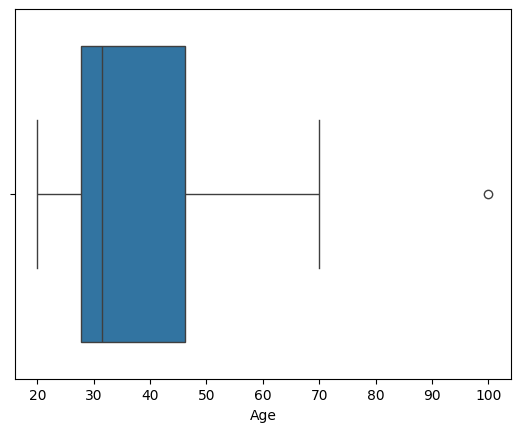

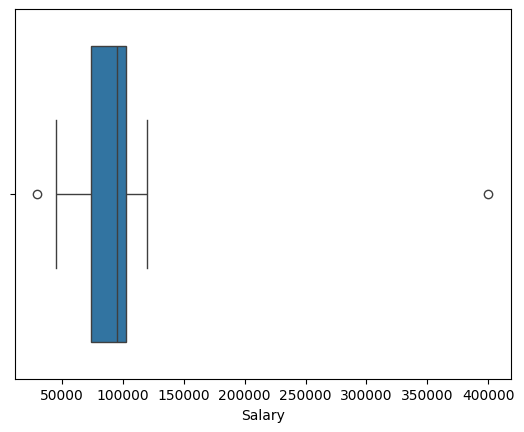

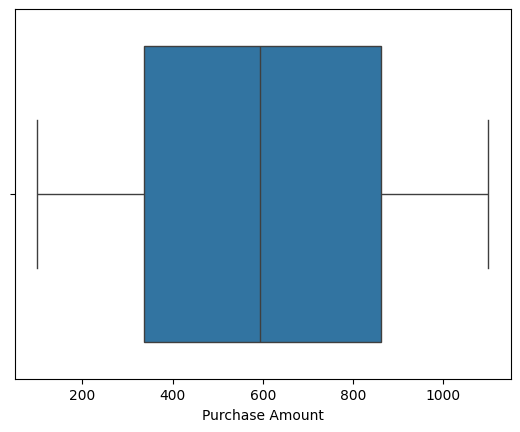

In [ ]:
# prompt: Boxplot for Age,Salary,Purchase amount

import seaborn as sns
sns.boxplot(data=data, x=data['Age'])
plt.show()
sns.boxplot(data=data, x=data['Salary'])
plt.show()
sns.boxplot(data=data, x=data['Purchase Amount'])
plt.show()


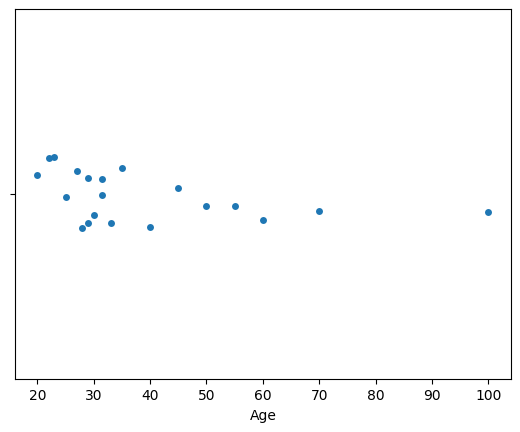

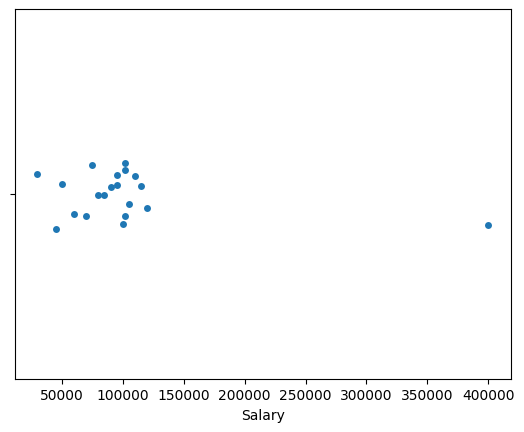

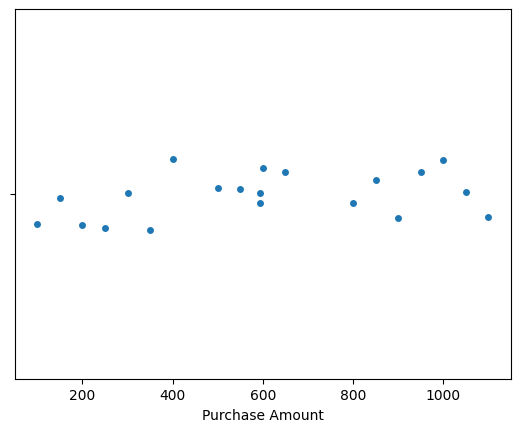

In [ ]:
# prompt: create stripplot for Age, Salary and Purchase Amount

sns.stripplot(data=data, x=data['Age'])
plt.show()
sns.stripplot(data=data, x=data['Salary'])
plt.show()
sns.stripplot(data=data, x=data['Purchase Amount'])
plt.show()


In [ ]:
data['Country'].fillna(data['Gender'].mode()[0],inplace=True)
data['Country'].fillna(data['Gender'].mode()[0],inplace=True)
data['Date of Purchase'].fillna(data['Date of Purchase'].mode()[0],inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20 non-null     int64  
 1   Age               20 non-null     float64
 2   Salary            20 non-null     float64
 3   Gender            20 non-null     object 
 4   Purchase Amount   20 non-null     float64
 5   Country           20 non-null     object 
 6   Date of Purchase  20 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ KB


In [ ]:
def remove_outliers(df,col):
  Q1=df[col].quantile(0.25)
  Q2=df[col].quantile(0.75)
  IQR=Q2-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q2+1.5*IQR
  df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
  return df

In [ ]:
data=remove_outliers(data,'Age')
data=remove_outliers(data,'Salary')
data=remove_outliers(data,'Purchase Amount')

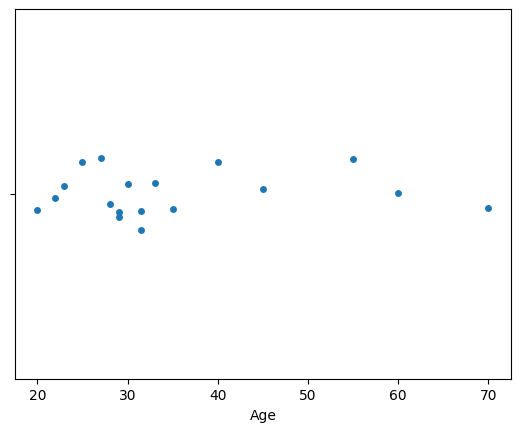

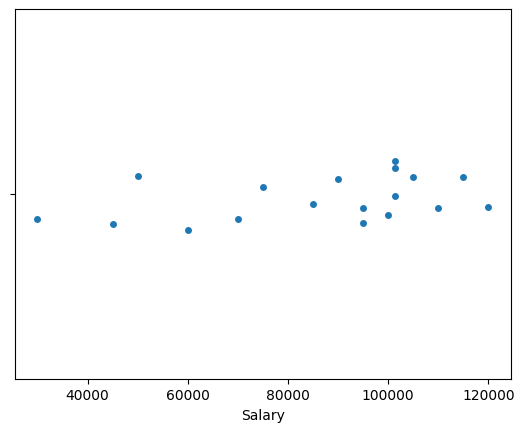

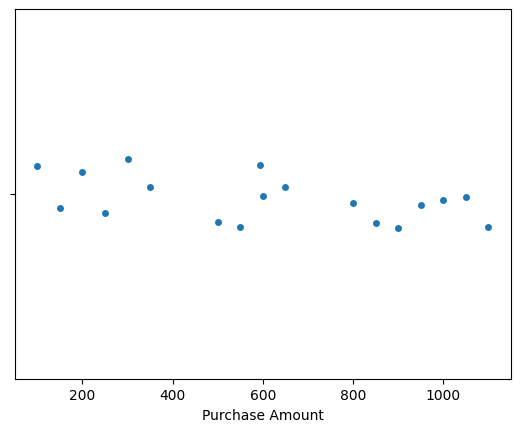

In [ ]:
# prompt: create stripplot for Age, Salary and Purchase Amount

sns.stripplot(data=data, x=data['Age'])
plt.show()
sns.stripplot(data=data, x=data['Salary'])
plt.show()
sns.stripplot(data=data, x=data['Purchase Amount'])
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 18
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                14 non-null     int64  
 1   Age               14 non-null     float64
 2   Salary            14 non-null     float64
 3   Gender            14 non-null     object 
 4   Purchase Amount   14 non-null     float64
 5   Country           14 non-null     object 
 6   Date of Purchase  14 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 896.0+ bytes


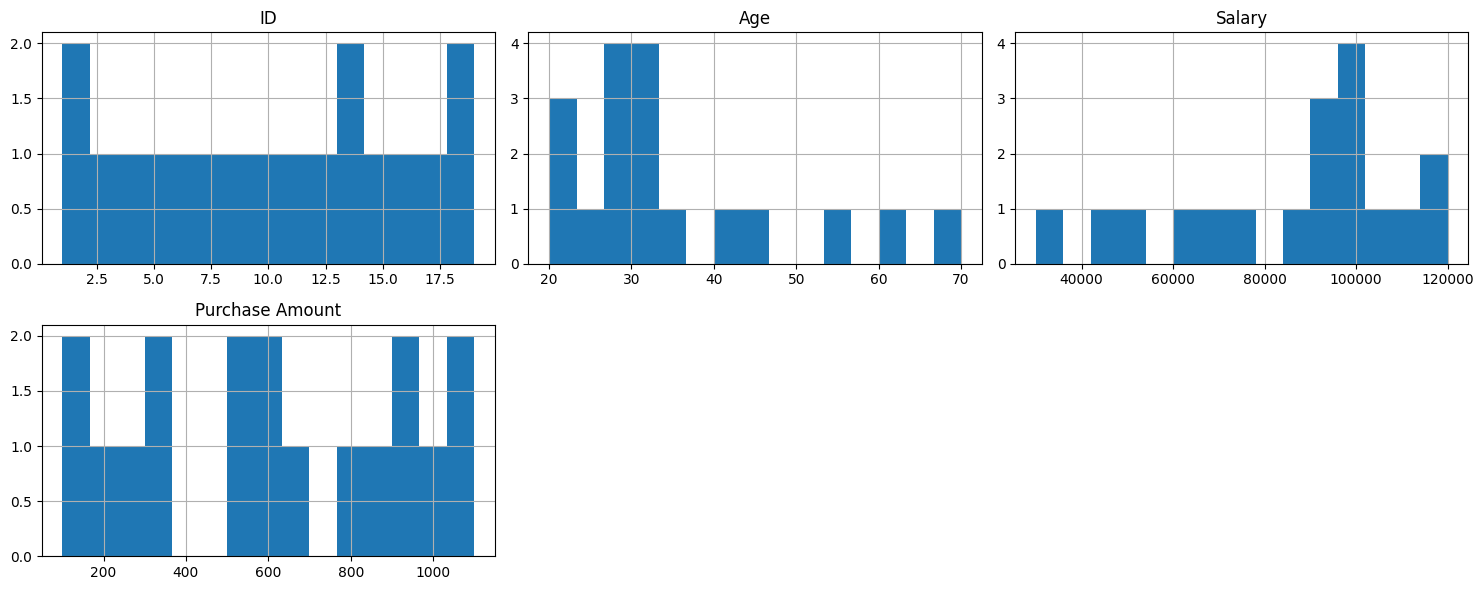

In [80]:
data.hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

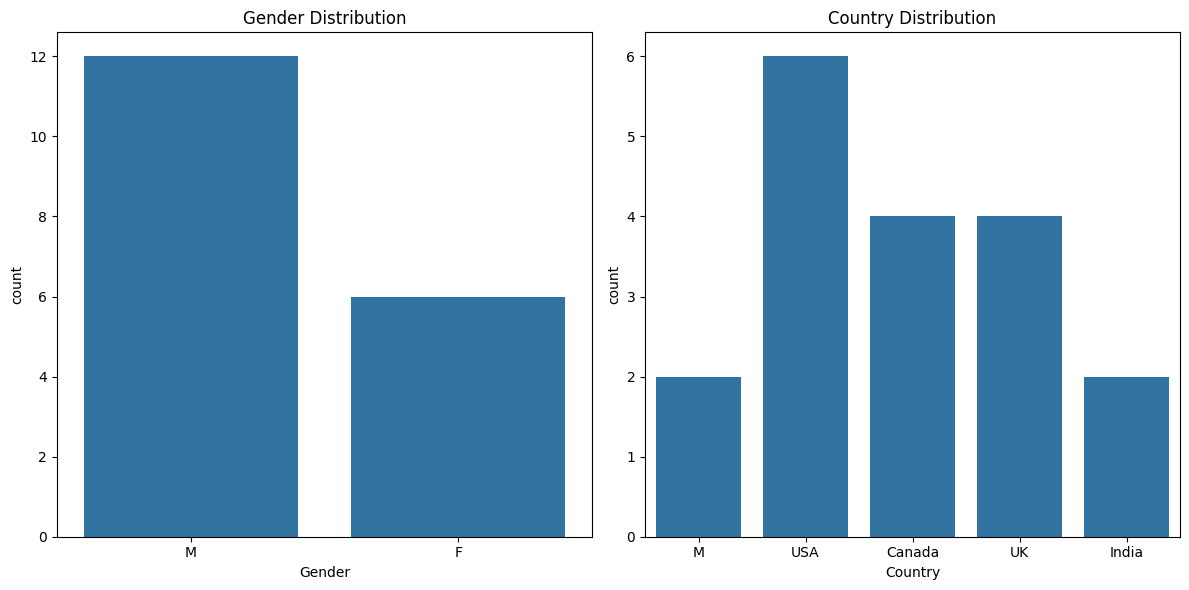

In [82]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Country', data=data)
plt.title('Country Distribution')

plt.tight_layout()
plt.show()


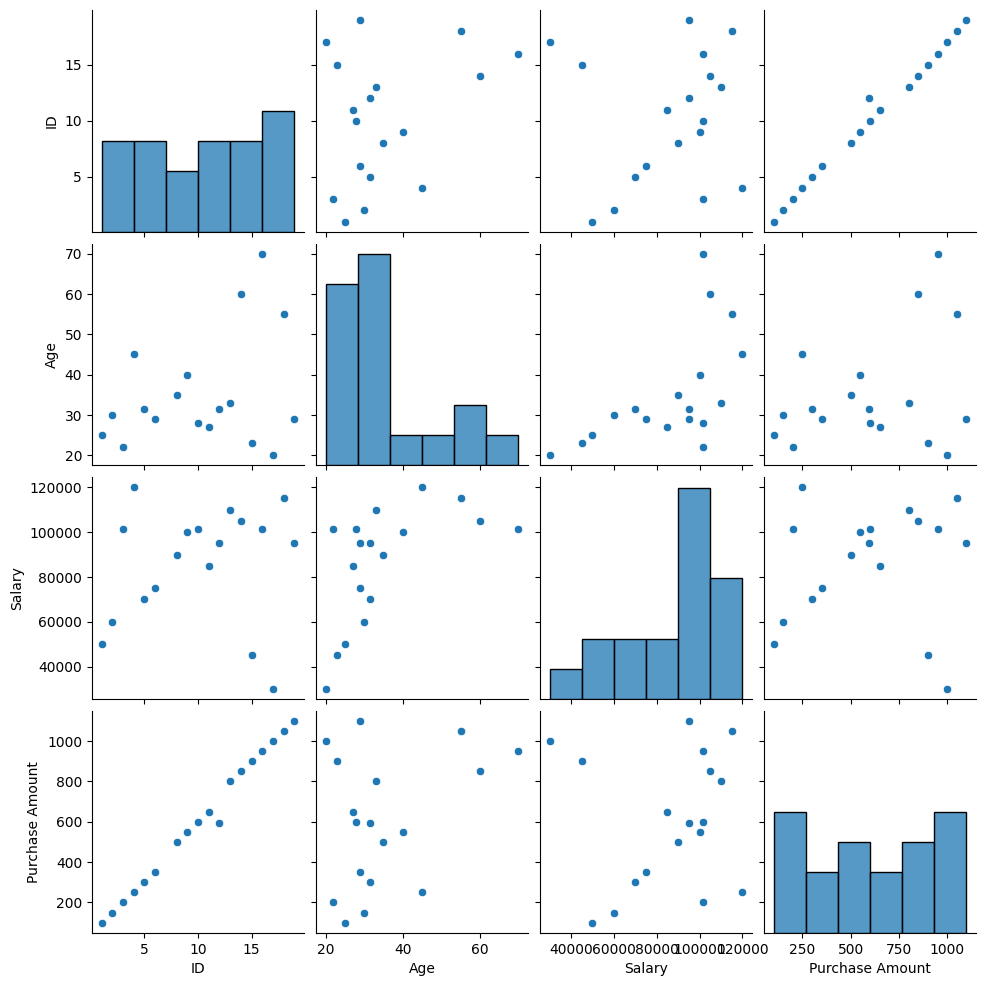

In [88]:
import seaborn as sns
sns.pairplot(data)
plt.show()


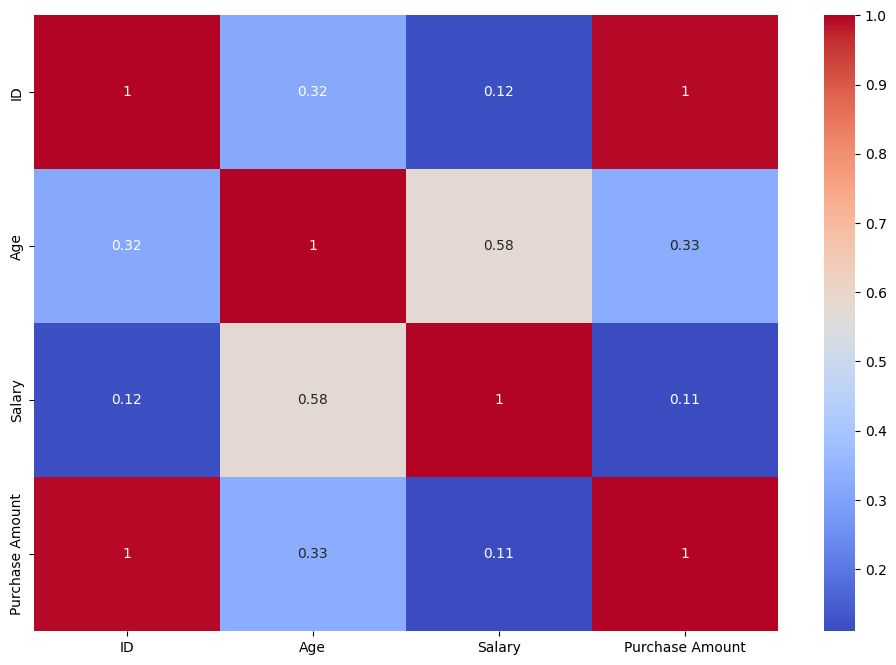

In [91]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Generate a heatmap of all variables
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()
